In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame
# gamintoją, kainą, pagaminimo datą, ridą, pavarų tipą, variklio informaciją.
# SQL užklausoje turite atmesti tuos įrašus, kur rida nenurodyta, 
# taip pat palikite tik nesikartojančius įrašus
# (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [5]:
#sql užklausa per pandas sql_query
sql="""with T1
as (select *, row_number() over (partition by id) as rc from autopliuslt)
select gamintojas, rida, price as kaina,
pagaminimo_data as data,
pavaros, variklis
from T1
where rc = 1 and rida != 'Nenurodyta' order by gamintojas;"""
df = pd.read_sql_query(sql, con=DB)
df

,gamintojas,rida,kaina,data,pavaros,variklis
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)"
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)"
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)"
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)"
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)"
...,...,...,...,...,...,...
1681,Volvo,510 000 km,15 900,2017-04,Mechaninė,"2000 cm³, 150 AG (110kW)"
1682,Volvo,96 000 km,18 250,2016,Automatinė,"1969 cm³, 245 AG (180kW)"
1683,Volvo,373 000 km,1 650,2005-01,Mechaninė,"2500 cm³, 220 AG (162kW)"
1684,Volvo,270 000 km,17 900,2015-04,Automatinė,"2400 cm³, 230 AG (169kW)"


In [9]:
# pridėkite naujus stulpelius - kaina, rida kaip skaičiai (integer) 
# su apply() metodu, pridėkite naują stulpelį amžius, kaip skaičius
sql="""with T1
as (select *, row_number() over (partition by id) as rc from autopliuslt)
select gamintojas, rida, price as kaina,
pagaminimo_data as data,
pavaros, variklis
from T1
where rc = 1 and rida != 'Nenurodyta' order by gamintojas;"""
df = pd.read_sql_query(sql, con=DB)


def rida(x):
    if x == 'Nenurodyta':
        return np.nan
    else:
        return int(x.replace(' ', '').replace('km', ''))

def kaina(x):
    return int(x.replace(' ', ''))

def amzius(x):
    return 2024 - int(x[:4])

df['R'] = df['rida'].apply(rida)
df['K'] = df['kaina'].apply(kaina)
df['amzius'] = df['data'].apply(amzius)
df.head()

# df['R'] = df['rida'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['K'] = df['kaina'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['amžius'] = df['data'].apply(lambda s: 2024-int(s[:4]))
# df.head()


,gamintojas,rida,kaina,data,pavaros,variklis,R,K,amzius
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)",305000,2100,17
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)",308615,4900,18
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)",45000,125000,9
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)",112000,25000,8
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)",450000,7800,23


In [13]:
# pridėkite dar vieną stulpelį, kur būtų rida, suapvalinta 5000 km intervalais
# np.ceil()
df['R5000'] = df['R'].apply(lambda x: int(np.ceil(x/5000) * 5000))
df.head()

,gamintojas,rida,kaina,data,pavaros,variklis,R,K,amzius,R5000
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)",305000,2100,17,305000
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)",308615,4900,18,310000
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)",45000,125000,9,45000
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)",112000,25000,8,115000
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)",450000,7800,23,450000


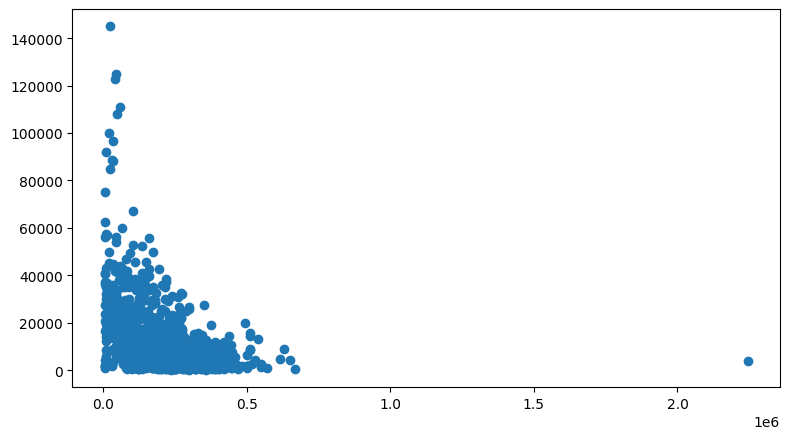

In [15]:


fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

axis.scatter(df['R5000'], df['K'])
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

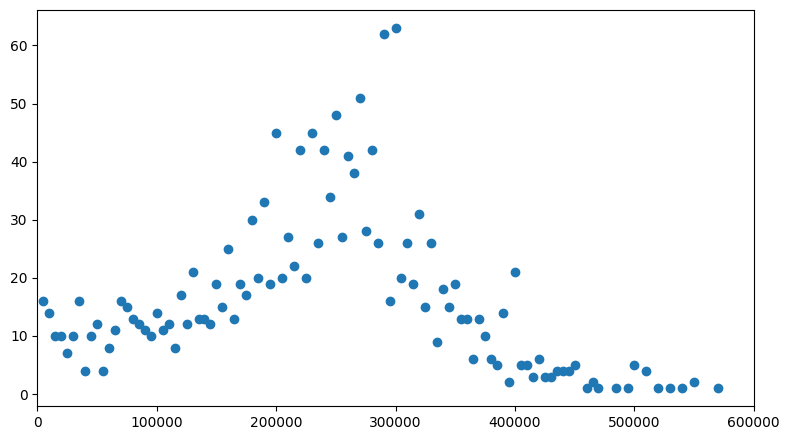

In [25]:
#  groupby(), agregacijos (mean, median), reset_index()
#  head() su groupby()

# dfg = df[['R5000', 'K']].groupby('R5000').median(numeric_only=True).reset_index()
dfg = df[['R5000', 'K']].groupby('R5000').count().reset_index()
# indeksu tampa tas stulpelis pagal kuri grupavome - kai nenaudojam reset_index()
#  kai naudojam reset_index() atsiranda naujas indeksu stulpelis
dfg.head()

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

axis.scatter(dfg['R5000'], dfg['K'])
axis.set_xlim(0, 6e5)
#axis.legend(loc='best')
axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [27]:
dfg = df[['R5000', 'K']].groupby('R5000').mean(numeric_only=True).reset_index()
dfg.head()

,R5000,K
0,5000,27957.187500
1,10000,30702.857143
2,15000,23330.800000
3,20000,35309.000000
4,25000,51850.000000


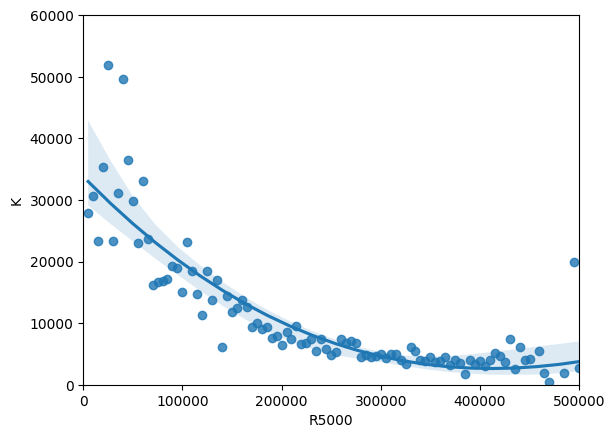

In [37]:
# seaborn regplot()

axis = sns.regplot(data=dfg, x='R5000', y='K', order=3)
axis.set_xlim(0, 5e5)
axis.set_ylim(0, 6e4)

plt.show()

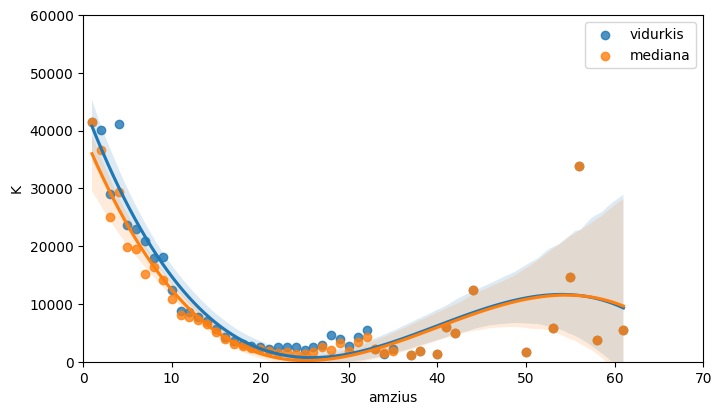

In [51]:
# # Vizualizuokite, kaip nuo amžiaus priklauso automobilių kaina.
# # Panaudokite seaborn regplot, kad pademonstruotumėte trendą

# Egidijus | VCS 7:33 PM
# trendas - tendencija
# df['A5m'] = df['amzius'].apply(lambda x: int(np.ceil(x/5) * 5))

amzmean = df[['amzius', 'K']].groupby('amzius').mean(numeric_only=True).reset_index()
amzmedian = df[['amzius', 'K']].groupby('amzius').median(numeric_only=True).reset_index()


fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

sns.regplot(data=amzmean, x='amzius', y='K', order=3, ax=axis, label='vidurkis')
sns.regplot(data=amzmedian, x='amzius', y='K', order=3, ax=axis, label='mediana')
axis.set_xlim(0, 70)
axis.set_ylim(0, 6e4)

axis.legend(loc='best')

plt.show()

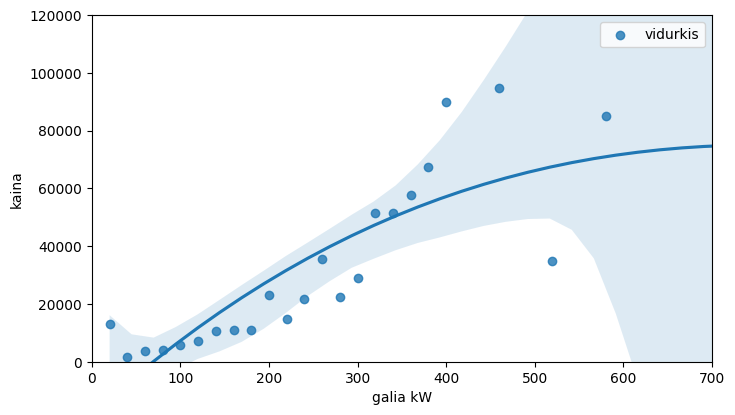

In [106]:
# Atvaizduokite priklausomybę tarp variklio galios kilovatais (kW) ir kainos.
# ar yra kokia nors pastebima priklausomybė?

# def galia(x):
#     if 'kW' in x:
#         return int(x.split('(')[-1][:-3])
#     return 0


def galia(x):
    if x == 'Nenurodyta' or x == '' or x.endswith('cm³'):
        return np.nan
    else:
        return int(x.split('(')[-1][:-3])

df['galiakW'] = df['variklis'].apply(galia)
df['galia50'] = df['galiakW'].apply(lambda x: (np.ceil(x/20) * 20))

# kW = df[['galiakW', 'K']].groupby('galiakW').mean(numeric_only=True).reset_index()
kW = df[['galia50', 'K']].groupby('galia50').mean(numeric_only=True).reset_index()

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

sns.regplot(data=kW, x='galia50', y='K', order=3, ax=axis, label='vidurkis')
# axis.plot(kW['galia50'], kW['K'], marker='o')

axis.set_xlim(0, 700)
axis.set_ylim(0, 12e4)
axis.set_xlabel('galia kW')
axis.set_ylabel('kaina')

axis.legend(loc='best')

plt.show()


In [103]:
def galia(x):
    if 'kW'in x:
        return int(x.split('(')[-1][:-3])
    return 0
    
df.head()

,gamintojas,rida,kaina,data,pavaros,variklis,R,K,amzius,R5000,A5m,galiakW,galia50
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)",305000,2100,17,305000,20,110.0,120.0
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)",308615,4900,18,310000,20,147.0,160.0
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)",45000,125000,9,45000,10,380.0,380.0
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)",112000,25000,8,115000,10,245.0,260.0
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)",450000,7800,23,450000,25,265.0,280.0


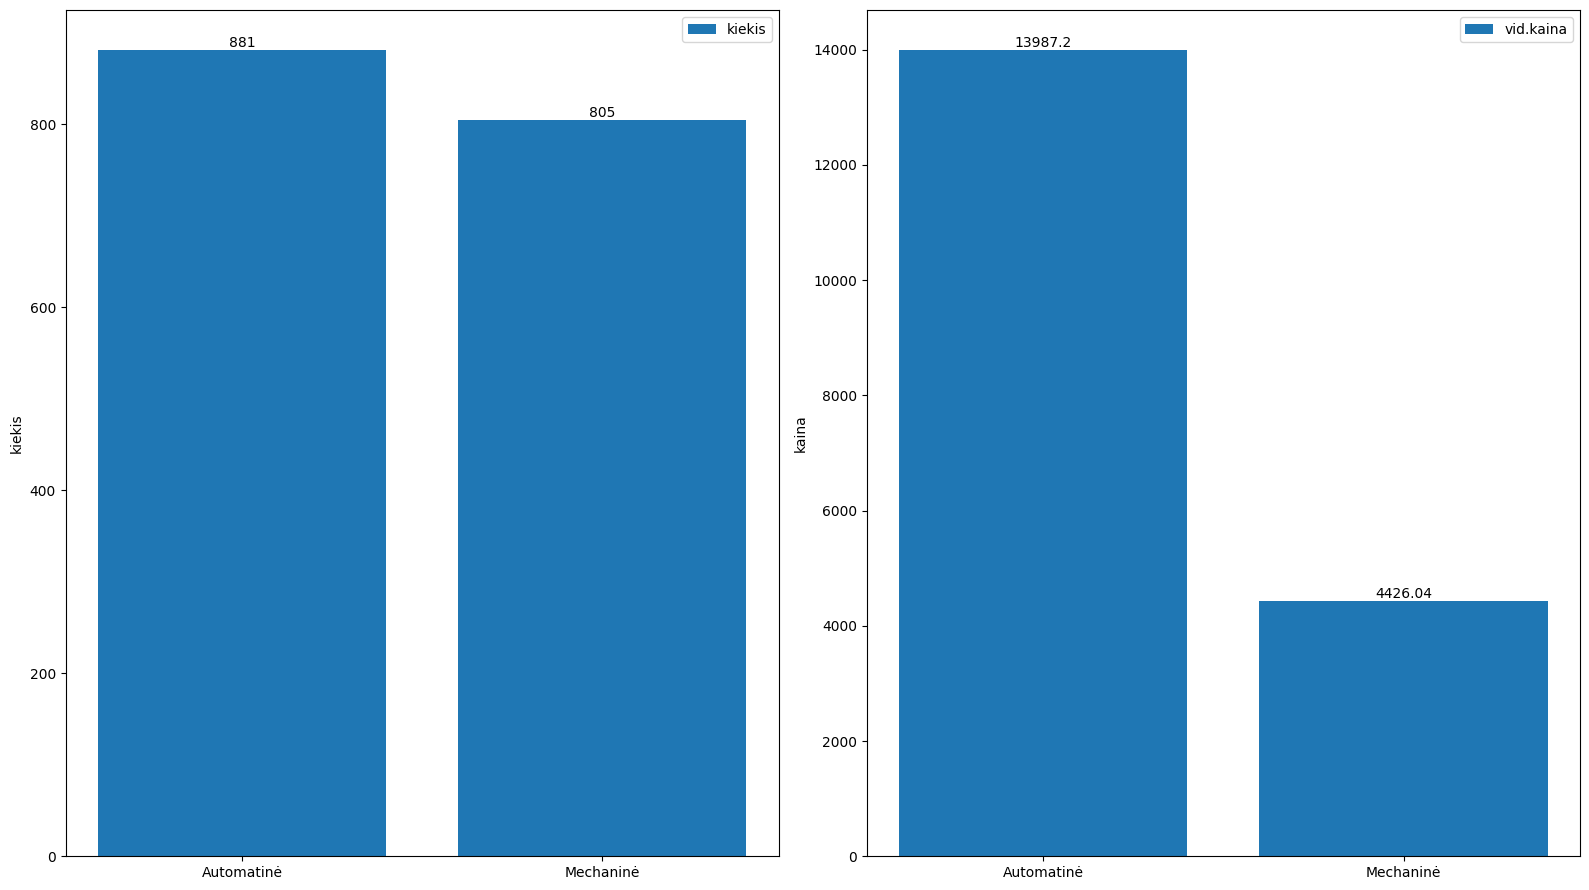

In [112]:
# kas brangiau - mechaninė ar automatinė? 
# Kiek vienetų rinkoje buvo su mechan, ir su automat?

df_p = df[['pavaros', 'K']]
# df_p.head()

c = df_p['pavaros'].value_counts()
deze = c.index
kiekis = c.values


df_dezes = df[['pavaros', 'K']].groupby('pavaros').mean(numeric_only=True).reset_index()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,9), gridspec_kw={'width_ratios':[1,1]})
#ax1:
#plotting code:
B1 = ax1.bar(deze, kiekis, label='kiekis')
ax1.bar_label(B1)
ax1.set_ylabel('kiekis')

ax1.legend(loc='best')
#ax2:
#plotting code:
B2 = ax2.bar(df_dezes['pavaros'], df_dezes['K'], label='vid.kaina')
ax2.bar_label(B2)
ax2.set_ylabel('kaina')


ax2.legend(loc='best')
fig.tight_layout()
plt.show()